# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\R2D2\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [5]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [6]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

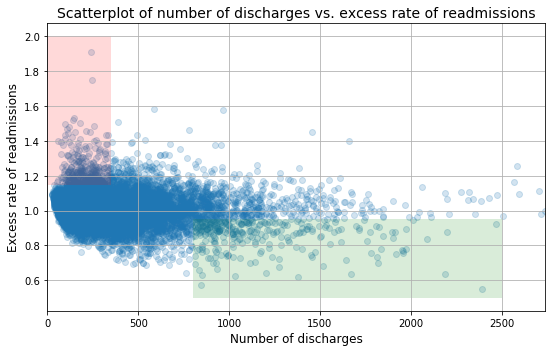

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with above hypothesis and conclusions as there is no statistical evidence or facts supporting the hypothesis are  provided.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

A correlation in the same direction is called a positive correlation. In positive correlation,if one variable increases the other also increases.In negative correlation,When one variable decreases the other also decreases.

Let's check the correlation between number of discharges and excess rate of readmissions.

In [8]:
# Pearson correlation
clean_hospital_read_df['Number of Discharges'].corr(clean_hospital_read_df['Excess Readmission Ratio'])

-0.09739794351079353

The correlation between number of discharges and excess rate of readmissions seems negative and the strength of association  is 'Weak'.

From above we can set up a hypothesis test as below:

#### Ho: There is no correlation between number of discharges and excess rate of readmissions
#### Ha: There is a correlation between number of discharges and excess rate of readmissions

Let's use the same statistics used in original analysis:

In [9]:
# Create one dataframe for hospitals with the number of discharges less than 100 and 
# another dataframe for number of discharges greater than 1000.
low_discharge_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
high_discharge_df= clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

In [10]:
low_discharge_df.isnull().sum()

Hospital Name                    0
Provider Number                  0
State                            0
Measure Name                     0
Number of Discharges             0
Footnote                      1188
Excess Readmission Ratio        81
Predicted Readmission Rate      81
Expected Readmission Rate       81
Number of Readmissions          81
Start Date                       0
End Date                         0
dtype: int64

In [11]:
# Drop NaN values from Excess Readmission Ratio column
low_discharge_df = low_discharge_df['Excess Readmission Ratio'].dropna()
high_discharge_df = high_discharge_df['Excess Readmission Ratio'].dropna()

#### 2. Compute and report the observed significance value (or p-value).

Let's perform a t-test to test null hypothesis. 

In [12]:
import scipy.stats as stats
t, p = stats.ttest_ind(low_discharge_df, high_discharge_df, equal_var = False)
print(" Ttest_result: t-value= %s  p-value= %s" %(t,p))

 Ttest_result: t-value= 7.601742418500486  p-value= 1.2752435451140344e-13


#### 3. Report statistical significance for  α  = .01.

The p-value of 1.2752435451140344e-13 is less than the significance level of 0.01, therefore I reject the null hypothesis. This means that there is a correlation between the number of discharges and excess rate of readmissions.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Let's now verify the statistics mentioned in preliminery report:

"In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1"

In [13]:
print("In hospitals/facilities with number of discharges < 100,mean excess readmission rate is: ",low_discharge_df.mean())
print("In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is:",high_discharge_df.mean())
low_discharge_era_percentage = (low_discharge_df[low_discharge_df > 1].count())/len(low_discharge_df)
high_discharge_era_percentage = (high_discharge_df[high_discharge_df > 1].count())/len(high_discharge_df)
print("% of excess readmission rate greater than 1,in hospitals/facilities with number of discharges < 100:", low_discharge_era_percentage)
print("% of excess readmission rate greater than 1,in hospitals/facilities with number of discharges> 1000:", high_discharge_era_percentage)

In hospitals/facilities with number of discharges < 100,mean excess readmission rate is:  1.0226183501683506
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is: 0.9783354211663071
% of excess readmission rate greater than 1,in hospitals/facilities with number of discharges < 100: 0.6321548821548821
% of excess readmission rate greater than 1,in hospitals/facilities with number of discharges> 1000: 0.4449244060475162


Above numbers validates the statistical analysis mentioned in preliminery report.

Statistical significance here indicates that our sample provides sufficient evidence to conclude that there exists a correlation between the number of discharges and excess rate of readmissions in the population.

While statistical significance relates here to whether an a correlation (effect) exists, practical significance refers to the magnitude of the effect.Here we might want to check whether a correlation between the number of discharges and excess rate of readmissions is large enough to care about.This can be done using effect size.

The effect size is just the standardised mean difference between the two groups. In other words:

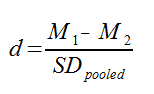

Where M1 and M2 are the means of 1st and 2nd group, and SDpooled is the pooled standard deviation for the groups.

In [14]:
# calculate effect Size
def effectsize(m1, m2):
    diff = m1.mean() - m2.mean()
    n1, n2 = len(m1), len(m2)
    var1 = m1.var()
    var2 = m2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    pooled_std = np.sqrt(pooled_var)
    #print(pooled_std)
    d = diff / pooled_std
    return d
effectsize(low_discharge_df, high_discharge_df)

0.5510622973628738

According to the standard interpretation, effect size= 0.55 is considered as moderate.

The analysis above shows that there is a significance between the number of discharges and the excess readmission ratio, but since the Pearson correlation is so close to zero, the correlation is "weak". The Practical signficance is moderate despite the weak statisical significance.

#### 5. Look at the scatterplot above. 
  #####    - What are the advantages and disadvantages of using this plot to convey information?

The scatterplot above does not give the clear picture of the relationship betweenthe number of discharges and the excess readmission ratio.The data pionts are overlapped.

#####    - Construct another plot that conveys the same information in a more direct manner.

To avoid overlapping in scatterplot, hexbin is a better alternative. 

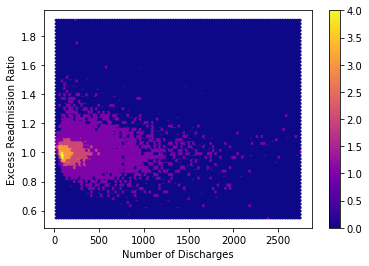

In [15]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
plt.hexbin(x, y, bins = 5, cmap="plasma")
plt.colorbar()
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()
